In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "valle d'aosta"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,2.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2020-12-15T17:00:00,2,Valle d'Aosta,74,6,80,447,527,-61,20,...,3.0,342.0,111.0,-58.0,7.50,15.18,5.85,18.02,-33.33,-10.37
295,2020-12-16T17:00:00,2,Valle d'Aosta,67,7,74,449,523,-4,38,...,4.0,393.0,266.0,2.0,9.46,14.15,9.67,14.29,16.67,-0.76
296,2020-12-17T17:00:00,2,Valle d'Aosta,70,8,78,417,495,-28,19,...,2.0,255.0,139.0,-32.0,10.26,15.76,7.45,13.67,14.29,-5.35
297,2020-12-18T17:00:00,2,Valle d'Aosta,70,7,77,423,500,5,24,...,3.0,233.0,100.0,6.0,9.09,15.40,10.30,24.00,-12.50,1.01


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 19, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 23
Nuovi tamponi: 270.0
Percentuale nuovi positivi/nuovi tamponi: 8.5 %
Nuovi guariti: 28.0
Nuovi deceduti: 1.0
Variazione positivi ricoverati con sintomi: 6.0
Variazione positivi in terapia intensiva: -3.0
Variazione positivi in isolamento dimiciliare: -9.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 19, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-20T17:00:00,2,Valle d'Aosta,36,5,41,684,725,67,75,...,0.0,583.0,172.0,56.0,12.20,5.66,12.86,43.60,25.00,10.18
1,2020-10-21T17:00:00,2,Valle d'Aosta,42,5,47,784,831,106,111,...,0.0,1555.0,220.0,100.0,10.64,5.66,7.14,50.45,0.00,14.62
2,2020-10-22T17:00:00,2,Valle d'Aosta,48,3,51,854,905,74,87,...,3.0,681.0,205.0,70.0,5.88,5.64,12.78,42.44,-40.00,8.90
3,2020-10-23T17:00:00,2,Valle d'Aosta,50,3,53,948,1001,96,97,...,0.0,440.0,174.0,94.0,5.66,5.29,22.05,55.75,0.00,10.61
4,2020-10-24T17:00:00,2,Valle d'Aosta,58,2,60,1033,1093,92,112,...,3.0,414.0,225.0,85.0,3.33,5.49,27.05,49.78,-33.33,9.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-15T17:00:00,2,Valle d'Aosta,74,6,80,447,527,-61,20,...,3.0,342.0,111.0,-58.0,7.50,15.18,5.85,18.02,-33.33,-10.37
57,2020-12-16T17:00:00,2,Valle d'Aosta,67,7,74,449,523,-4,38,...,4.0,393.0,266.0,2.0,9.46,14.15,9.67,14.29,16.67,-0.76
58,2020-12-17T17:00:00,2,Valle d'Aosta,70,8,78,417,495,-28,19,...,2.0,255.0,139.0,-32.0,10.26,15.76,7.45,13.67,14.29,-5.35
59,2020-12-18T17:00:00,2,Valle d'Aosta,70,7,77,423,500,5,24,...,3.0,233.0,100.0,6.0,9.09,15.40,10.30,24.00,-12.50,1.01


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

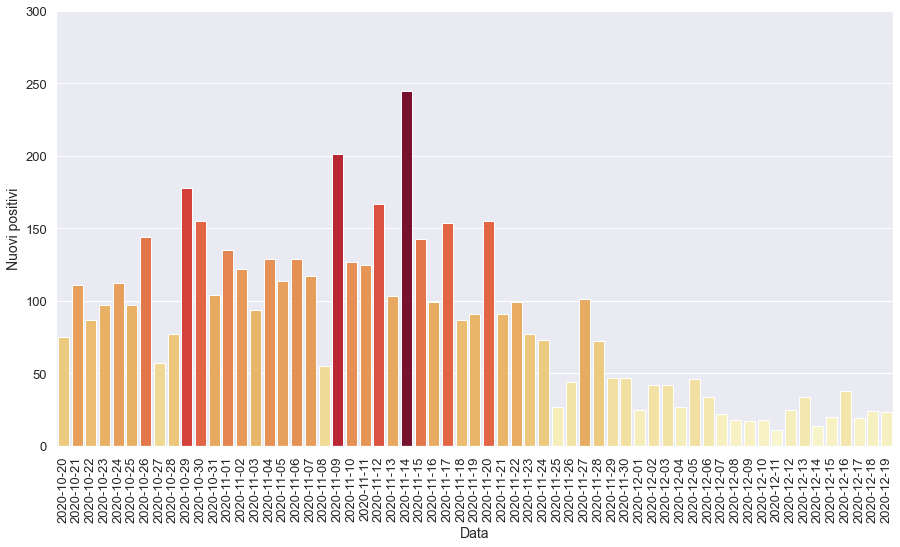

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

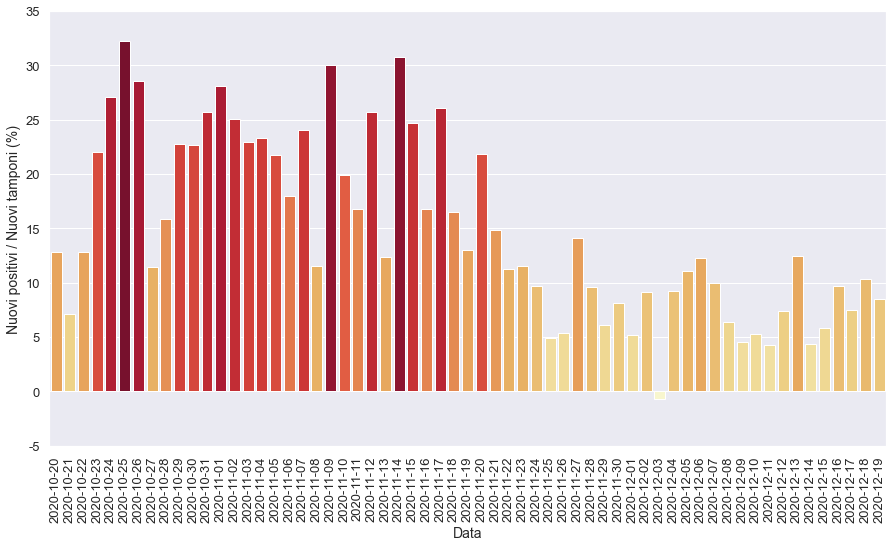

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

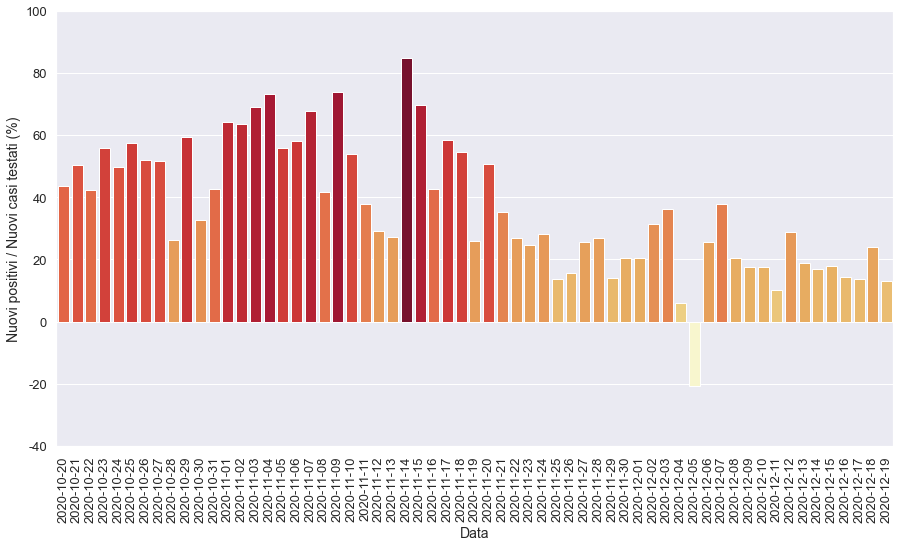

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

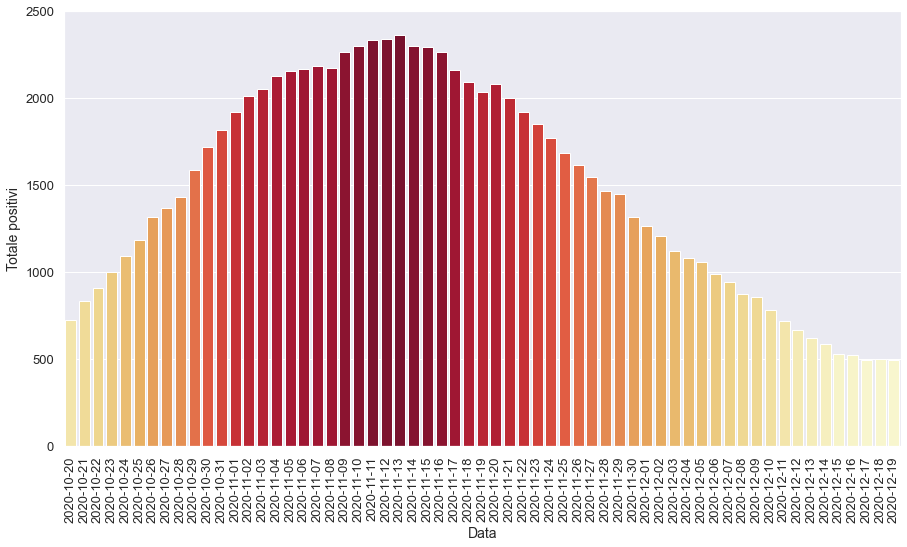

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

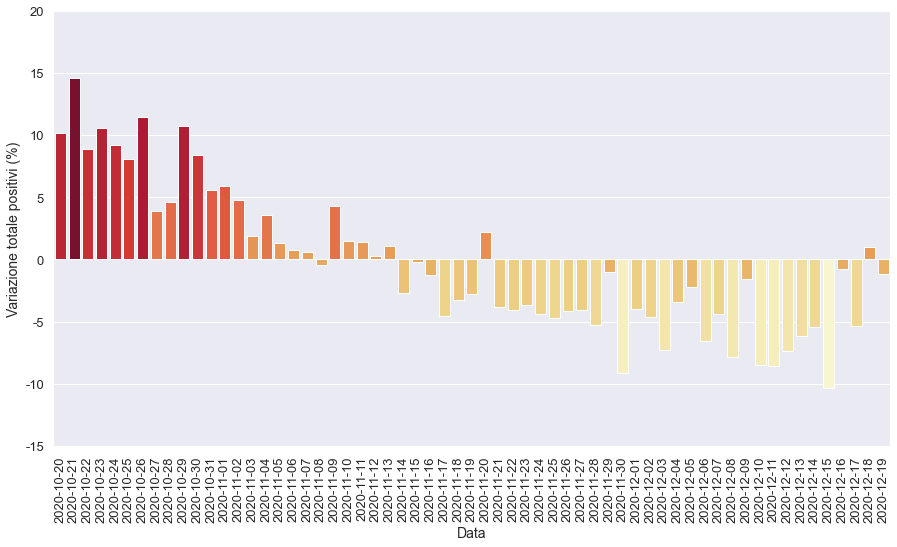

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

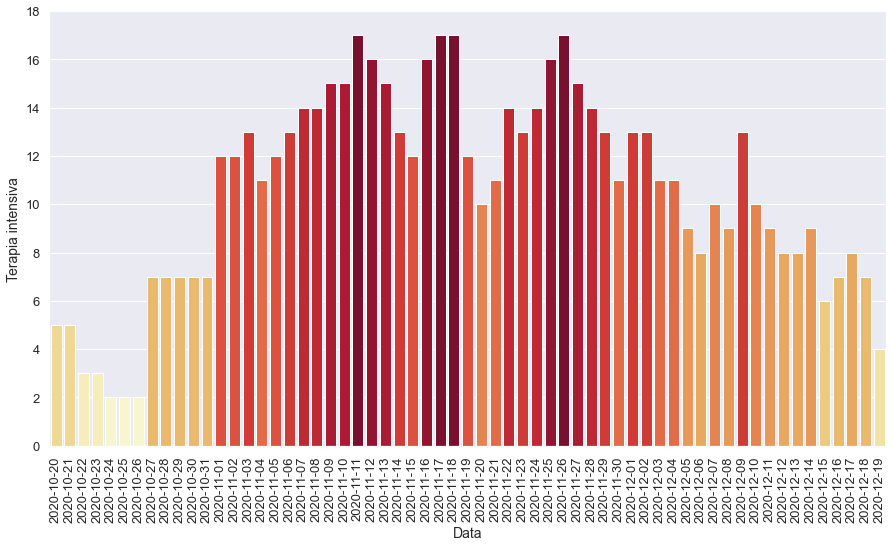

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

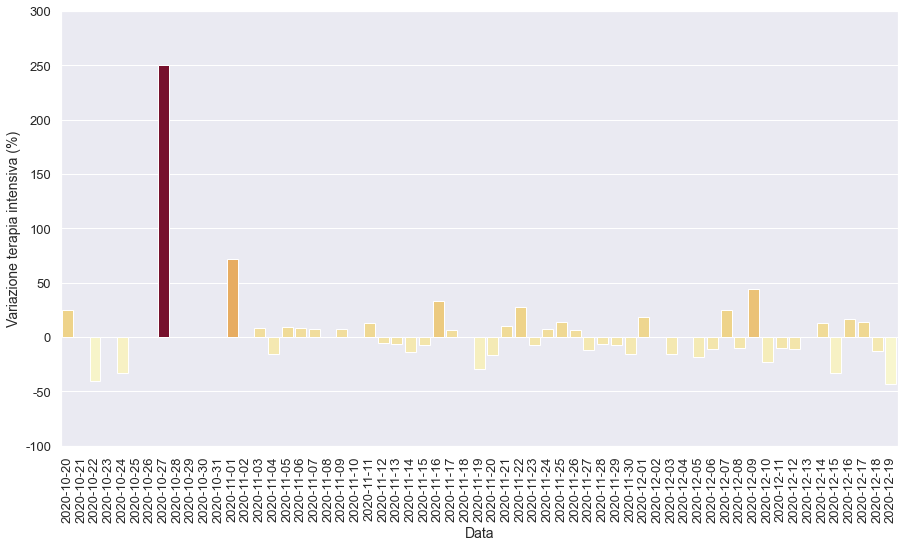

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

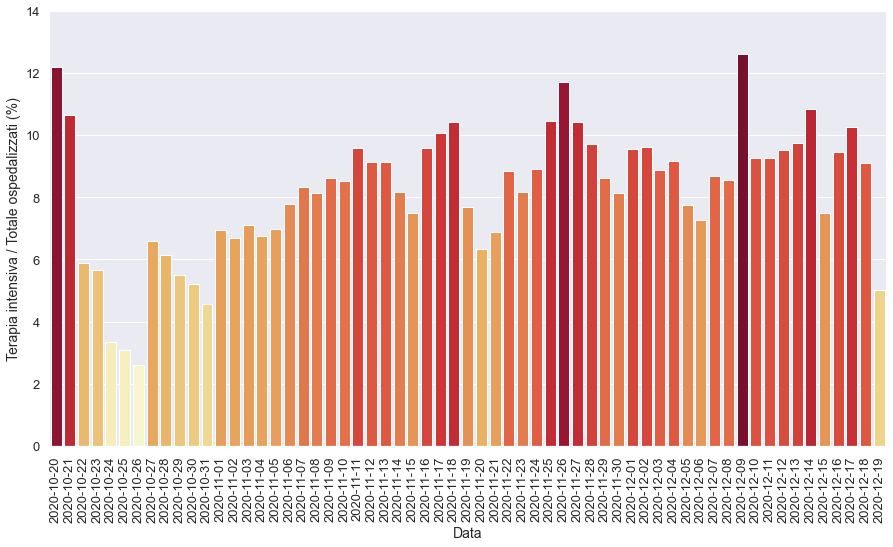

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

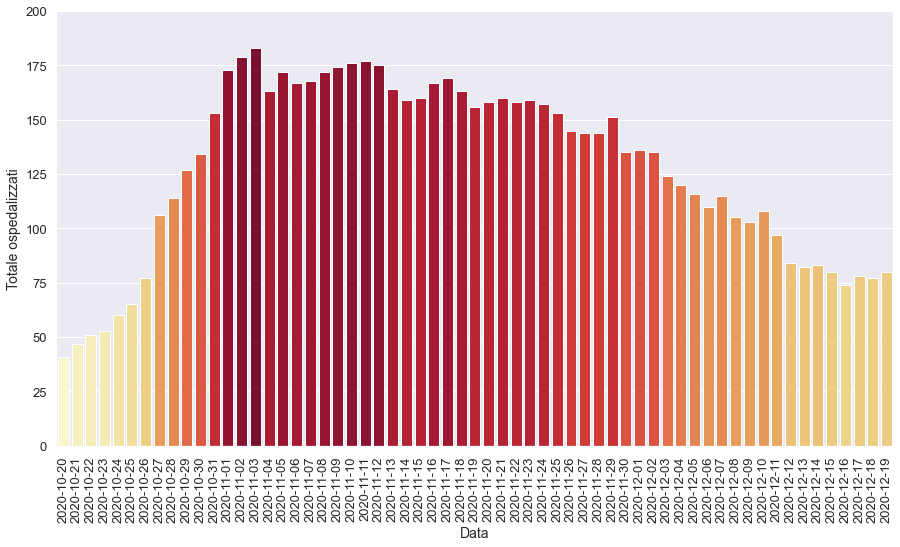

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

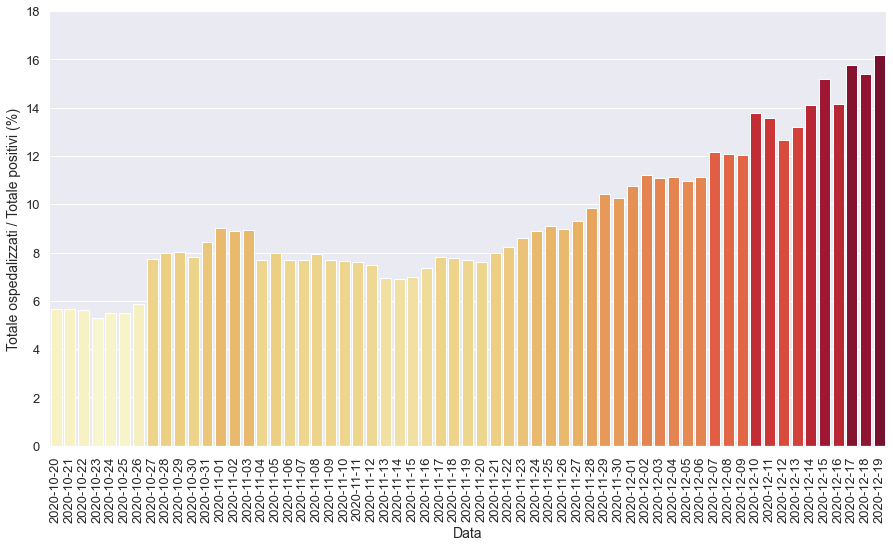

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

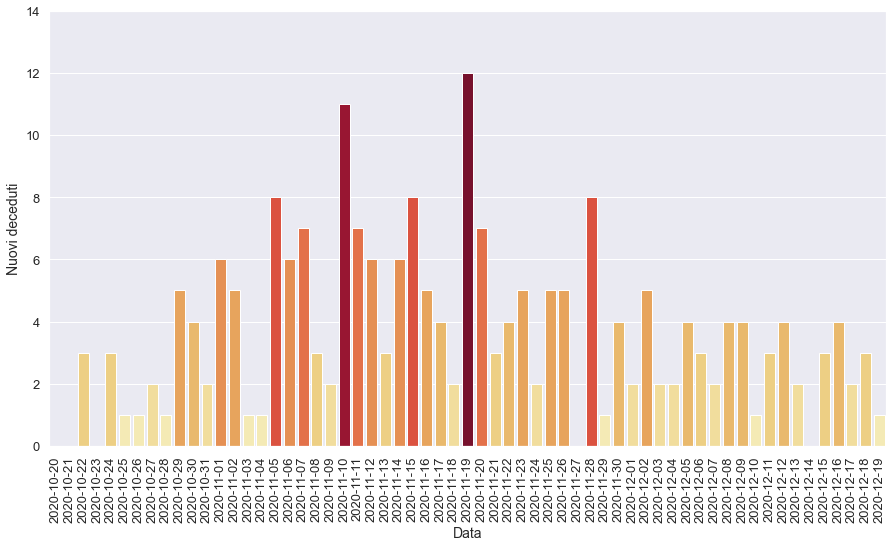

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

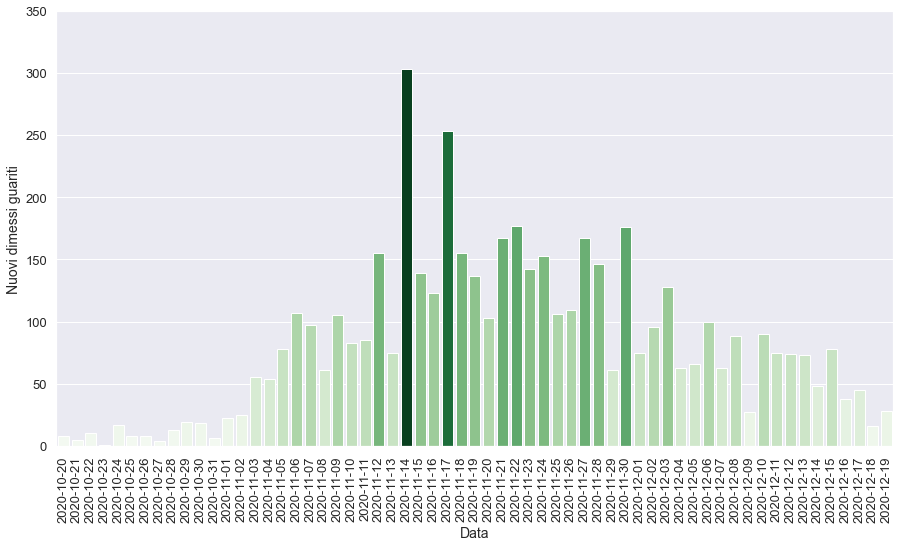

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-19T17:00:00,2,Valle d'Aosta,144,12,156,1879,2035,-58,91,...,12.0,700.0,351.0,-51.0,7.69,7.67,13.00,25.93,-29.41,-2.77
1,2020-11-20T17:00:00,2,Valle d'Aosta,148,10,158,1922,2080,45,155,...,7.0,711.0,306.0,43.0,6.33,7.60,21.80,50.65,-16.67,2.21
2,2020-11-21T17:00:00,2,Valle d'Aosta,149,11,160,1841,2001,-79,91,...,3.0,613.0,257.0,-81.0,6.88,8.00,14.85,35.41,10.00,-3.80
3,2020-11-22T17:00:00,2,Valle d'Aosta,144,14,158,1761,1919,-82,99,...,4.0,881.0,369.0,-80.0,8.86,8.23,11.24,26.83,27.27,-4.10
4,2020-11-23T17:00:00,2,Valle d'Aosta,146,13,159,1690,1849,-70,77,...,5.0,666.0,314.0,-71.0,8.18,8.60,11.56,24.52,-7.14,-3.65
5,2020-11-24T17:00:00,2,Valle d'Aosta,143,14,157,1610,1767,-82,73,...,2.0,752.0,259.0,-80.0,8.92,8.89,9.71,28.19,7.69,-4.43
6,2020-11-25T17:00:00,2,Valle d'Aosta,137,16,153,1530,1683,-84,27,...,5.0,544.0,196.0,-80.0,10.46,9.09,4.96,13.78,14.29,-4.75
7,2020-11-26T17:00:00,2,Valle d'Aosta,128,17,145,1468,1613,-70,44,...,5.0,821.0,282.0,-62.0,11.72,8.99,5.36,15.60,6.25,-4.16
8,2020-11-27T17:00:00,2,Valle d'Aosta,129,15,144,1403,1547,-66,101,...,0.0,715.0,396.0,-65.0,10.42,9.31,14.13,25.51,-11.76,-4.09
9,2020-11-28T17:00:00,2,Valle d'Aosta,130,14,144,1321,1465,-82,72,...,8.0,749.0,268.0,-82.0,9.72,9.83,9.61,26.87,-6.67,-5.30


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

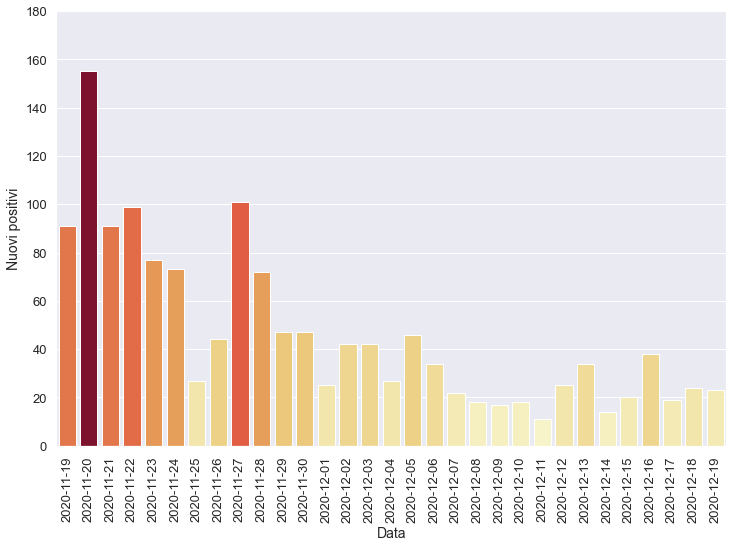

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

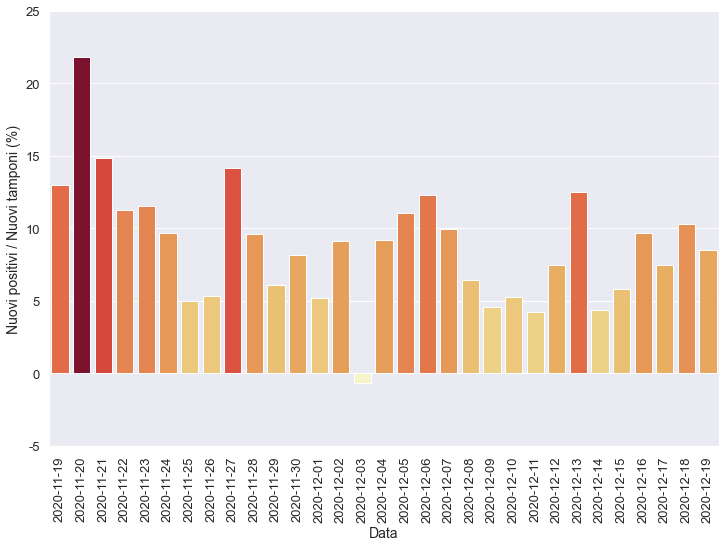

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

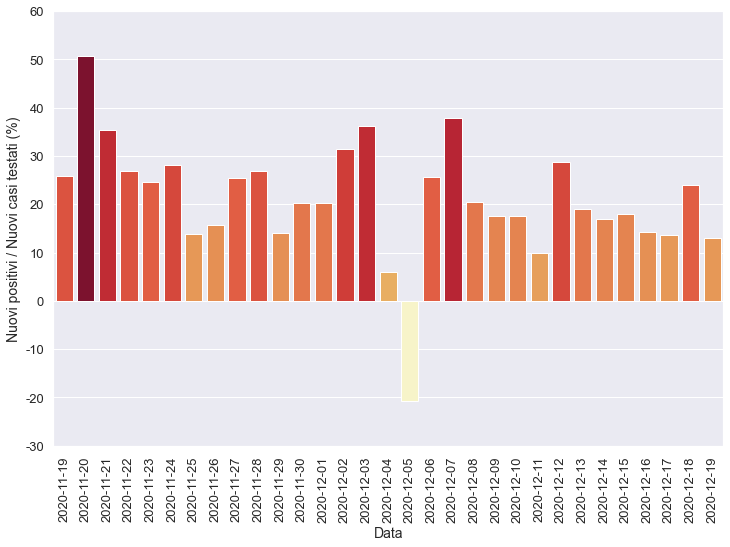

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

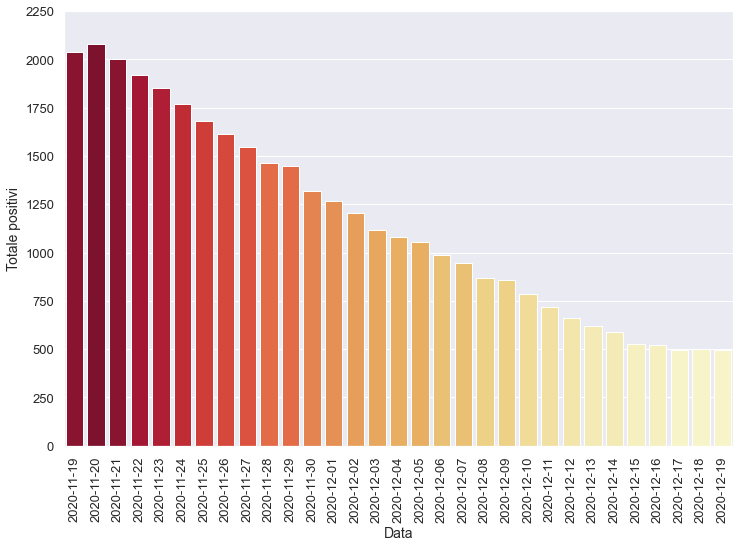

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

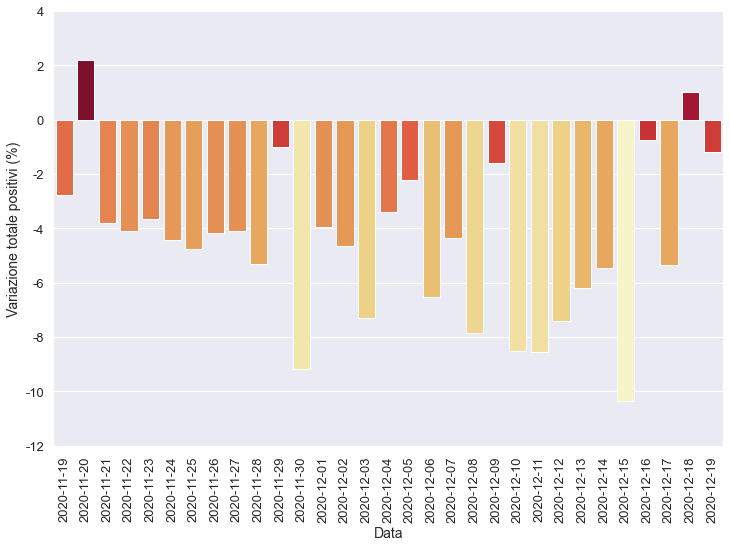

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

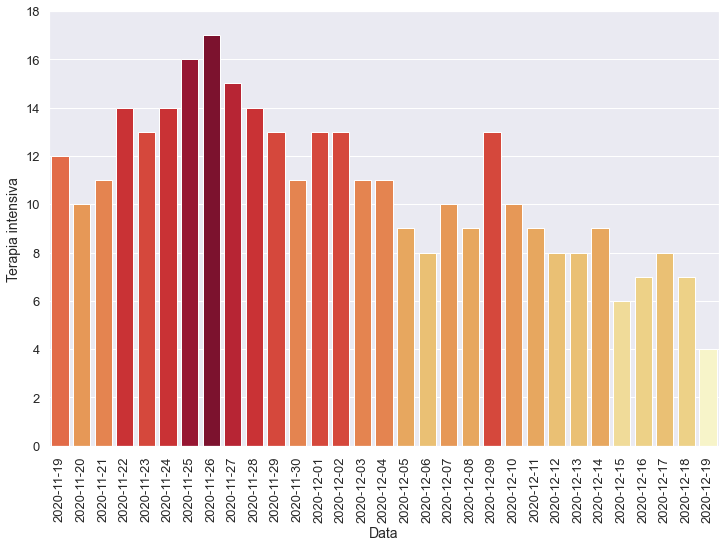

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

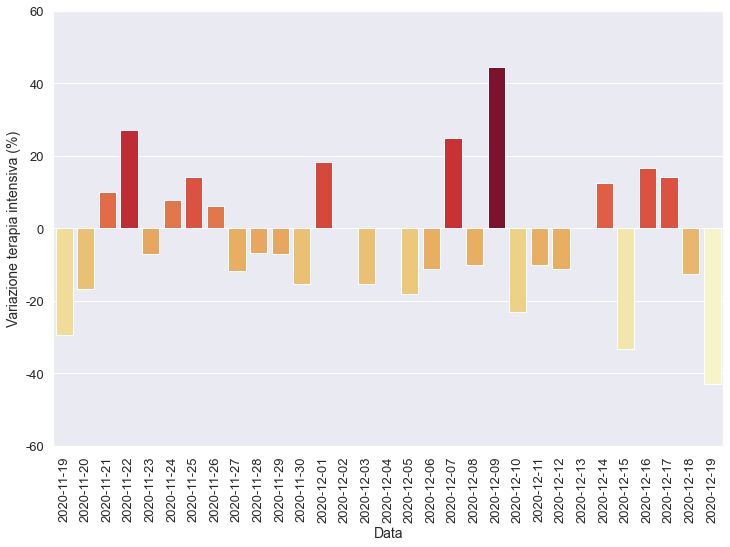

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

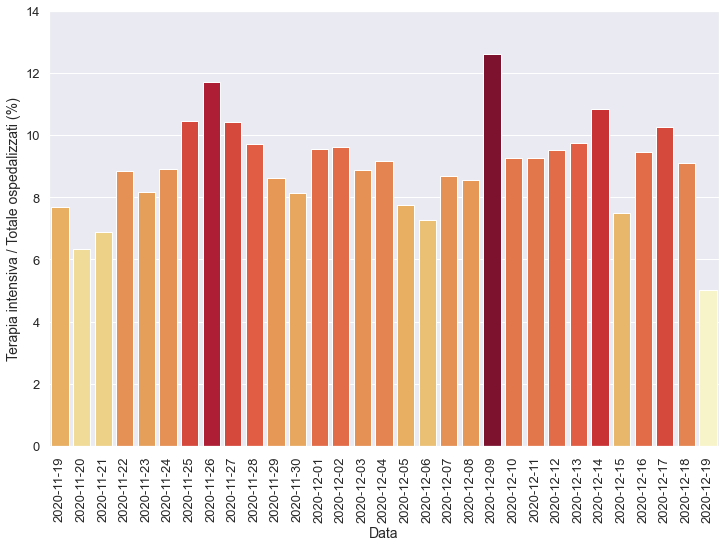

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

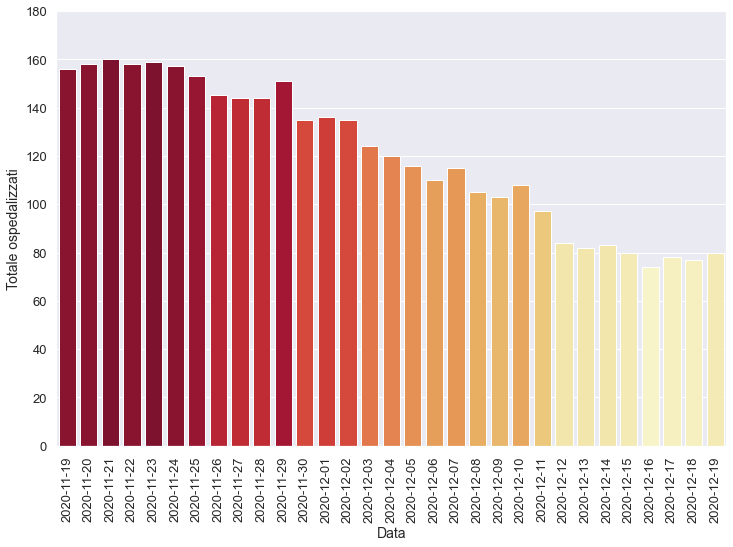

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

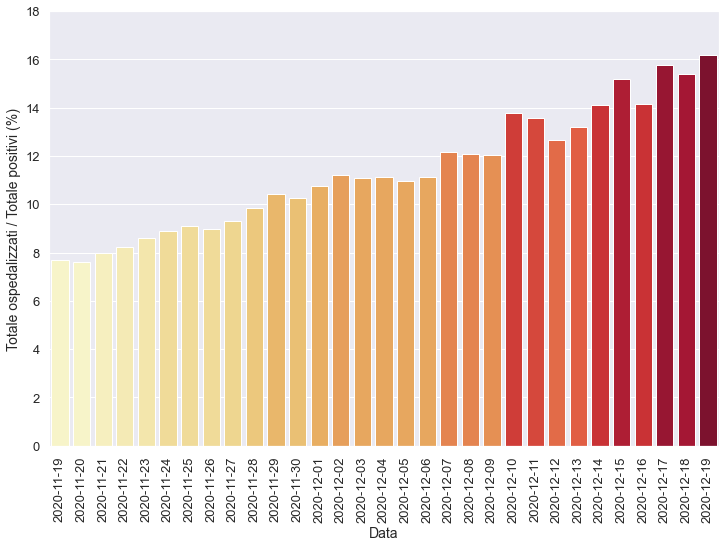

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

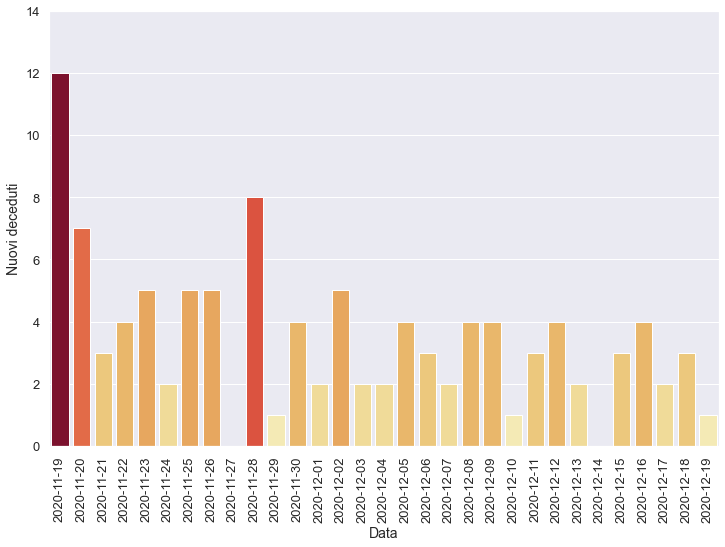

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

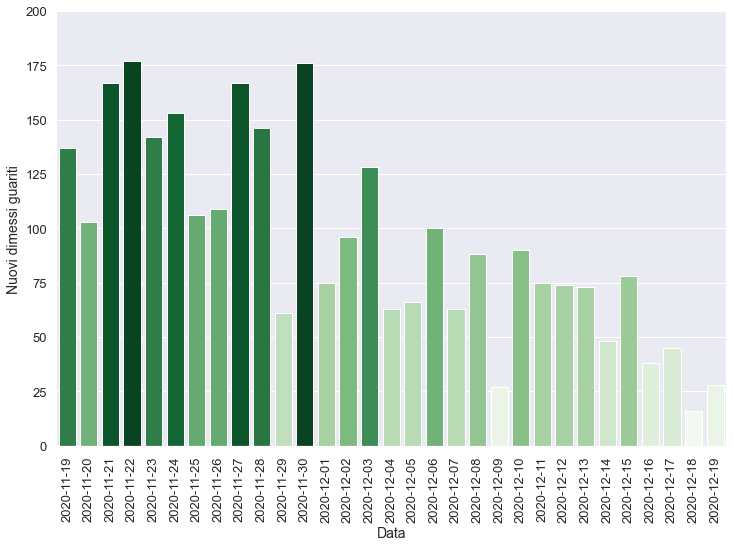

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-12T17:00:00,2,Valle d'Aosta,76,8,84,579,663,-53,25,...,4.0,336.0,87.0,-40.0,9.52,12.67,7.44,28.74,-11.11,-7.40
1,2020-12-13T17:00:00,2,Valle d'Aosta,74,8,82,540,622,-41,34,...,2.0,272.0,179.0,-39.0,9.76,13.18,12.50,18.99,0.00,-6.18
2,2020-12-14T17:00:00,2,Valle d'Aosta,74,9,83,505,588,-34,14,...,0.0,320.0,83.0,-35.0,10.84,14.12,4.38,16.87,12.50,-5.47
3,2020-12-15T17:00:00,2,Valle d'Aosta,74,6,80,447,527,-61,20,...,3.0,342.0,111.0,-58.0,7.50,15.18,5.85,18.02,-33.33,-10.37
4,2020-12-16T17:00:00,2,Valle d'Aosta,67,7,74,449,523,-4,38,...,4.0,393.0,266.0,2.0,9.46,14.15,9.67,14.29,16.67,-0.76
5,2020-12-17T17:00:00,2,Valle d'Aosta,70,8,78,417,495,-28,19,...,2.0,255.0,139.0,-32.0,10.26,15.76,7.45,13.67,14.29,-5.35
6,2020-12-18T17:00:00,2,Valle d'Aosta,70,7,77,423,500,5,24,...,3.0,233.0,100.0,6.0,9.09,15.40,10.30,24.00,-12.50,1.01
7,2020-12-19T17:00:00,2,Valle d'Aosta,76,4,80,414,494,-6,23,...,1.0,270.0,176.0,-9.0,5.00,16.19,8.52,13.07,-42.86,-1.20


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

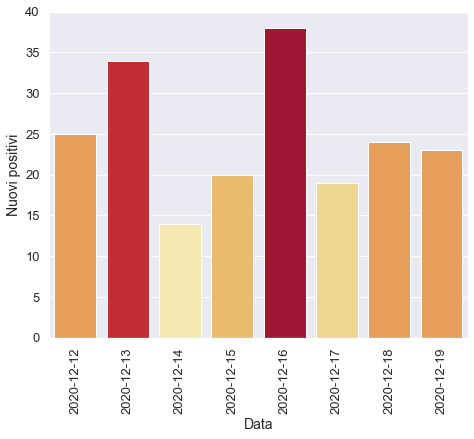

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

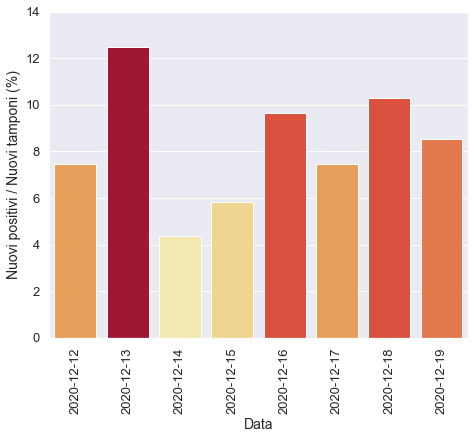

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

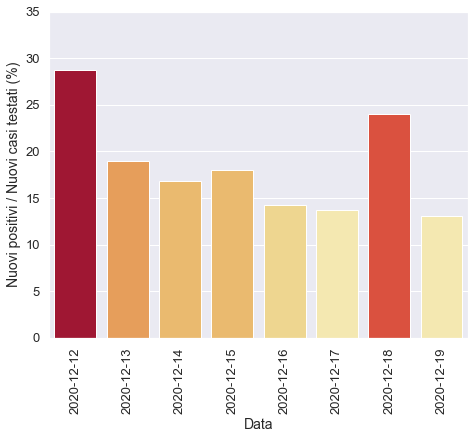

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

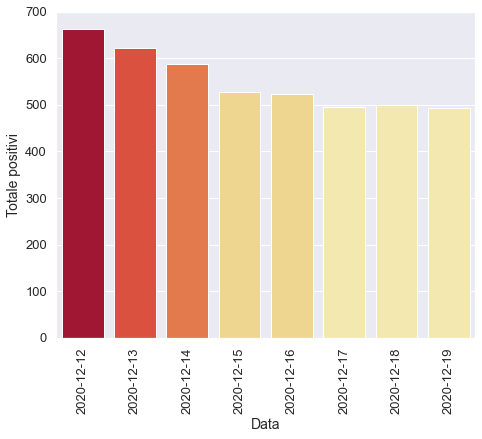

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

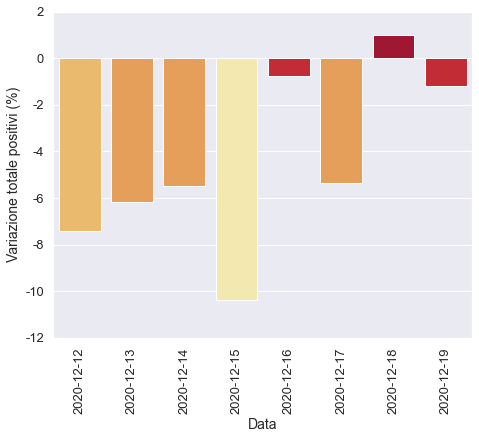

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

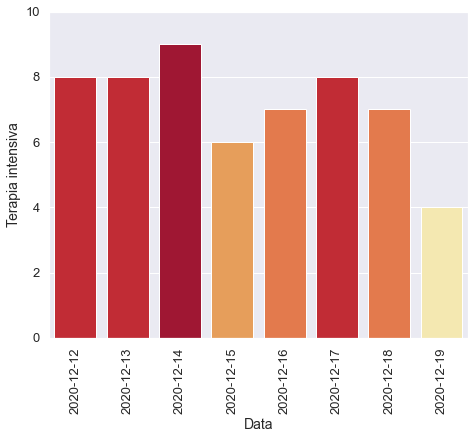

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

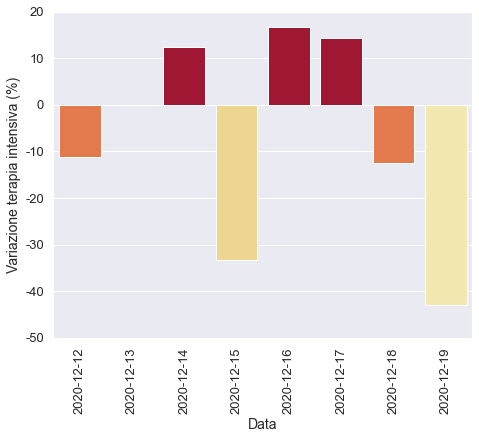

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

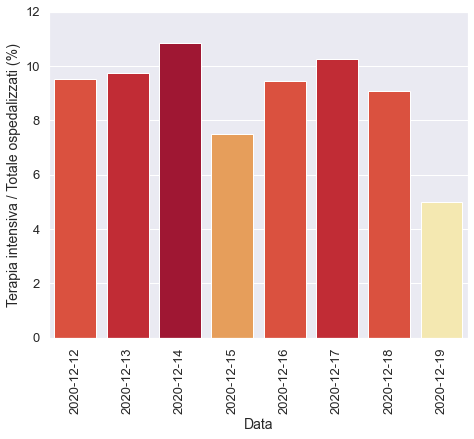

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

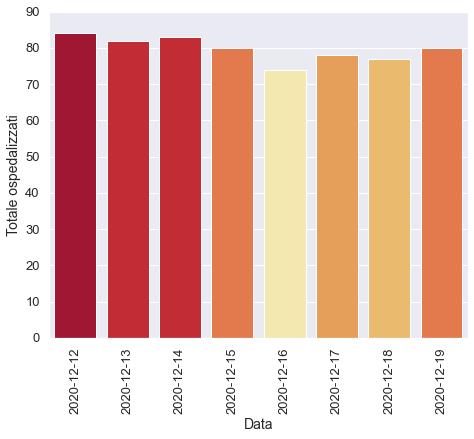

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

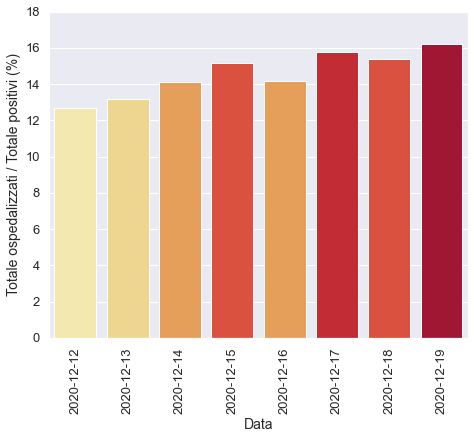

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

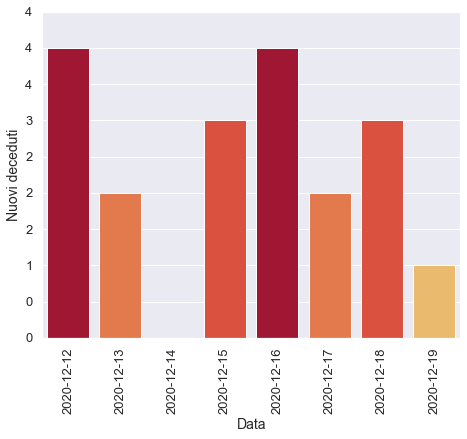

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

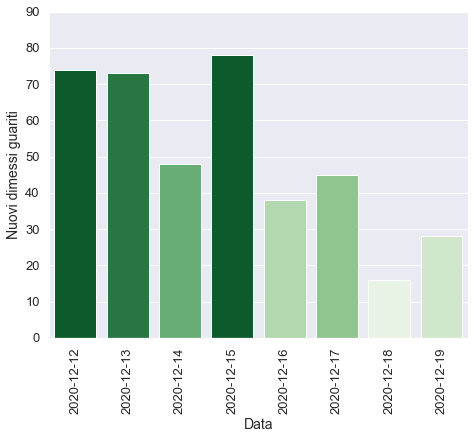

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)